In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow

     |████████████████████████████████| 462 kB 12.7 MB/s 


In [ ]:
tf.__version__

'2.8.0'

# New section

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import psycopg2 as ps
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [35]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

In [4]:
#db_path = r'D:\OneDrive - Nelson Mandela University\Work_Other\DSI\Module_2\Twist_Bike_london\data\Bike_london.db'
db_path = r'/content/drive/MyDrive/Colab Notebooks/data/Bike_london.db'
connection = sqlite3.connect(db_path)

In [5]:
pd.read_sql('''SELECT * FROM main''', connection)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_week,day_month,month,NO,NO2,NOX,PM10,ReadingDateTime
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,6,4,1,75.8,74.3,190.50000,NaN,2015-01-04 00:00:00
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,6,4,1,44.5,66.2,134.50000,NaN,2015-01-04 01:00:00
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,6,4,1,36.2,60.5,116.10000,NaN,2015-01-04 02:00:00
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,6,4,1,34.0,59.8,111.90000,NaN,2015-01-04 03:00:00
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,6,4,1,26.6,56.9,97.60000,NaN,2015-01-04 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,19,1,3,1,139.8,88.0,302.39999,21.0,2017-01-03 19:00:00
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,20,1,3,1,75.7,83.5,199.50000,21.0,2017-01-03 20:00:00
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,21,1,3,1,105.3,87.5,249.00000,19.0,2017-01-03 21:00:00
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,22,1,3,1,60.8,75.6,168.80000,19.0,2017-01-03 22:00:00


In [6]:
df = pd.read_sql('''SELECT * FROM main''', connection)
df['timestamp'] = pd.to_datetime(df.timestamp)
df.index = df.timestamp
df = df.drop(columns = ['ReadingDateTime','timestamp'])

print(df.shape)
df.head()

(17414, 17)


,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_week,day_month,month,NO,NO2,NOX,PM10
timestamp,,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,6,4,1,75.8,74.3,190.5,NaN
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,6,4,1,44.5,66.2,134.5,NaN
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,6,4,1,36.2,60.5,116.1,NaN
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,6,4,1,34.0,59.8,111.9,NaN
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,6,4,1,26.6,56.9,97.6,NaN


In [7]:
#For now I will replace the missing value by the mean
import sklearn
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
df.iloc[:,13:17] = imputer.fit_transform(df.iloc[:,13:17]) 

In [8]:
df.isnull().sum()

cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
hour            0
day_week        0
day_month       0
month           0
NO              0
NO2             0
NOX             0
PM10            0
dtype: int64

# Check distribution

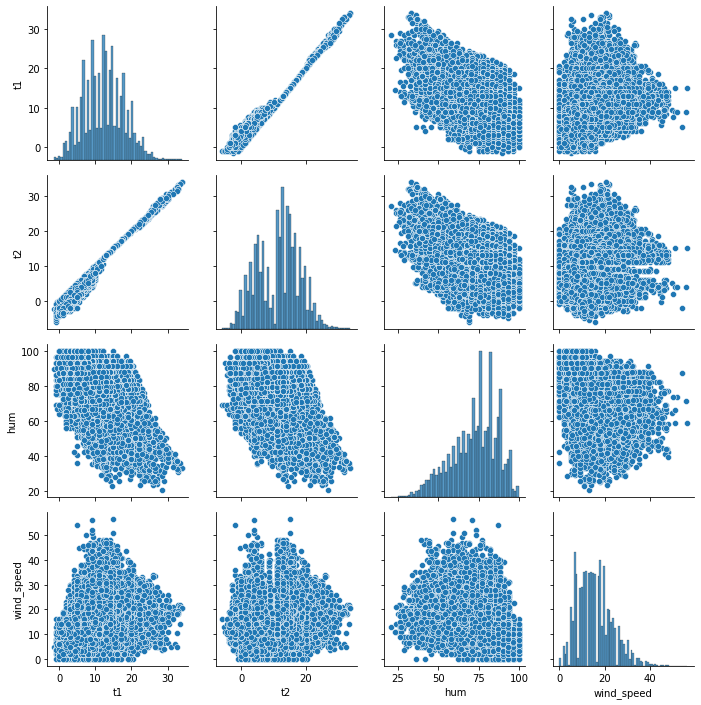

In [ ]:
g = sns.PairGrid(df.iloc[:,[1,2,3,4]])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.show()

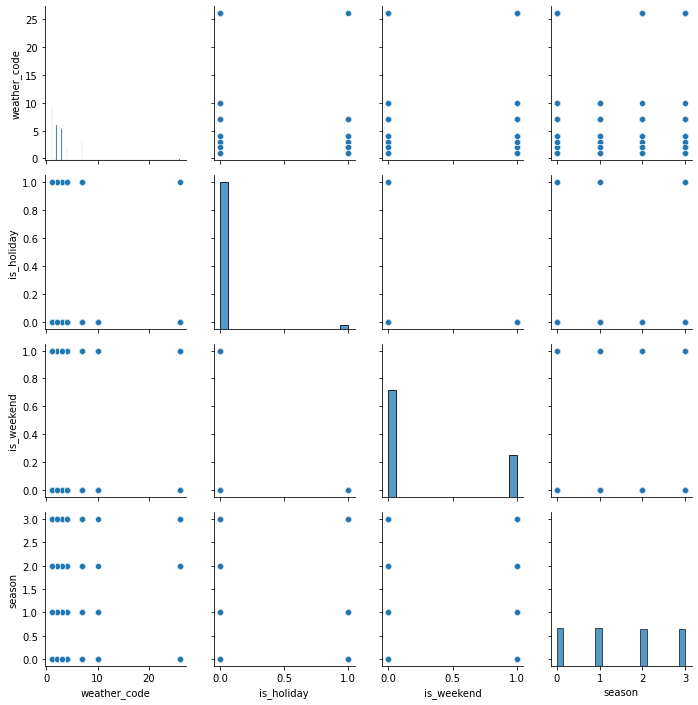

In [ ]:
g = sns.PairGrid(df.iloc[:,[5,6,7,8]])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.show()

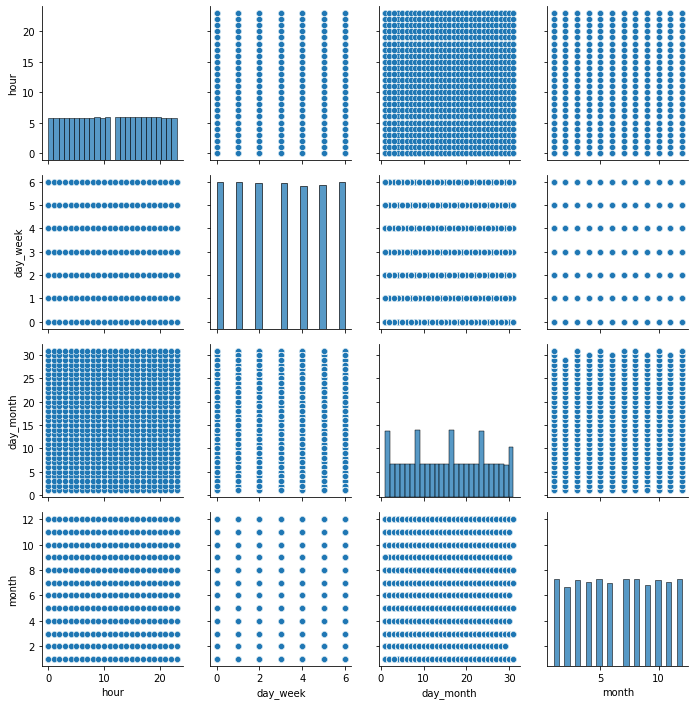

In [ ]:
g = sns.PairGrid(df.iloc[:,[9,10,11,12]])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.show()

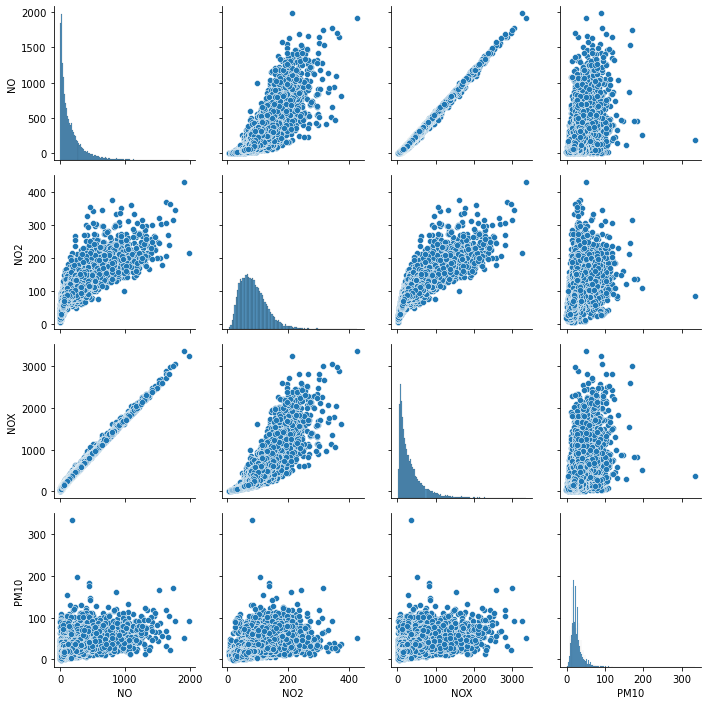

In [ ]:
g = sns.PairGrid(df.iloc[:,[13,14,15,16]])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.show()

# Modelling

In [22]:

from sklearn.preprocessing import RobustScaler
def transform_num(df):
  pd.options.mode.chained_assignment = None
  f_columns = ['t1', 't2', 'hum', 'wind_speed','NO','NO2','NOX','PM10']

  f_transformer = RobustScaler()
  cnt_transformer = RobustScaler()

  f_transformer = f_transformer.fit(df[f_columns].to_numpy())
  cnt_transformer = cnt_transformer.fit(df[['cnt']])

  df.loc[:, f_columns] = f_transformer.transform(df[f_columns].to_numpy())
  df['cnt'] = cnt_transformer.transform(df[['cnt']])
  pd.options.mode.chained_assignment = 'warn'
  return df

In [23]:

def create_dataset(x, y, time_steps=1):
    xs, ys = [], []
    for i in range(len(x) - time_steps):
        v = x.iloc[i:(i + time_steps)].values
        xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(xs), np.array(ys)

In [24]:
def get_model(x_train):  
  model = keras.Sequential()
  model.add(
    keras.layers.Bidirectional(
      keras.layers.LSTM(
        units=128, 
        #activation='relu',
        input_shape=(x_train.shape[1], x_train.shape[2])
      )
    )
  )
  model.add(keras.layers.Dropout(rate=0.2))
  model.add(keras.layers.Dense(units=1))
  model.compile(loss='mean_squared_error', optimizer='adam')  
  return model

## Split the data 
We want to keep a test set that the model is never going to see to evaluate it

In [25]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(np.shape(train), np.shape(test))

(15672, 17) (1742, 17)


In [26]:
time_steps = 24

#transform the test and train data separatly 
train_scaled = transform_num(train)
test_scaled = transform_num(test)

# Create subsets of shape [#samples/rows, time_steps, n_features]
x_train, y_train = create_dataset(train_scaled.iloc[:,1:], train_scaled.cnt, time_steps)
x_test, y_test = create_dataset(test_scaled.iloc[:,1:], test_scaled.cnt, time_steps)

print(np.shape(x_train), np.shape(y_train))
print(np.shape(x_test), np.shape(y_test))

(15648, 24, 16) (15648,)
(1718, 24, 16) (1718,)


Epoch 1/20
441/441 [==============================] - 18s 21ms/step - loss: 0.3360 - val_loss: 0.3096
Epoch 2/20
441/441 [==============================] - 7s 17ms/step - loss: 0.1771 - val_loss: 0.1625
Epoch 3/20
441/441 [==============================] - 7s 17ms/step - loss: 0.1096 - val_loss: 0.1143
Epoch 4/20
441/441 [==============================] - 7s 17ms/step - loss: 0.0818 - val_loss: 0.0939
Epoch 5/20
441/441 [==============================] - 7s 17ms/step - loss: 0.0656 - val_loss: 0.0867
Epoch 6/20
441/441 [==============================] - 7s 17ms/step - loss: 0.0589 - val_loss: 0.0909
Epoch 7/20
441/441 [==============================] - 7s 17ms/step - loss: 0.0538 - val_loss: 0.0855
Epoch 8/20
441/441 [==============================] - 7s 17ms/step - loss: 0.0496 - val_loss: 0.0767
Epoch 9/20
441/441 [==============================] - 7s 17ms/step - loss: 0.0473 - val_loss: 0.0771
Epoch 10/20
441/441 [==============================] - 8s 18ms/step - loss: 0.0461 - val_l

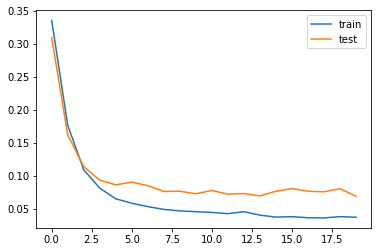

In [27]:


# Load model
model = get_model(x_train)

# run the model
history = model.fit(
    x_train, y_train, 
    epochs=20, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False)
    
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();


In [28]:
# Save the model to be used later if needed 
model.save(r'/content/drive/MyDrive/Colab Notebooks/model')


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/model/assets


In [30]:
y_pred = model.predict(x_test)

In [ ]:
# def transform_num_inverse(df):
#   pd.options.mode.chained_assignment = None
#   f_columns = ['t1', 't2', 'hum', 'wind_speed']

#   f_transformer = RobustScaler()
#   cnt_transformer = RobustScaler()

#   f_transformer = f_transformer.fit(df[f_columns].to_numpy())
#   cnt_transformer = cnt_transformer.fit(df[['cnt']])

#   df.loc[:, f_columns] = f_transformer.transform(df[f_columns].to_numpy())
#   df['cnt'] = cnt_transformer.transform(df[['cnt']])
#   pd.options.mode.chained_assignment = 'warn'
#   return df

In [31]:
cnt_transformer = RobustScaler()
cnt_transformer = cnt_transformer.fit(df[['cnt']])
y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)

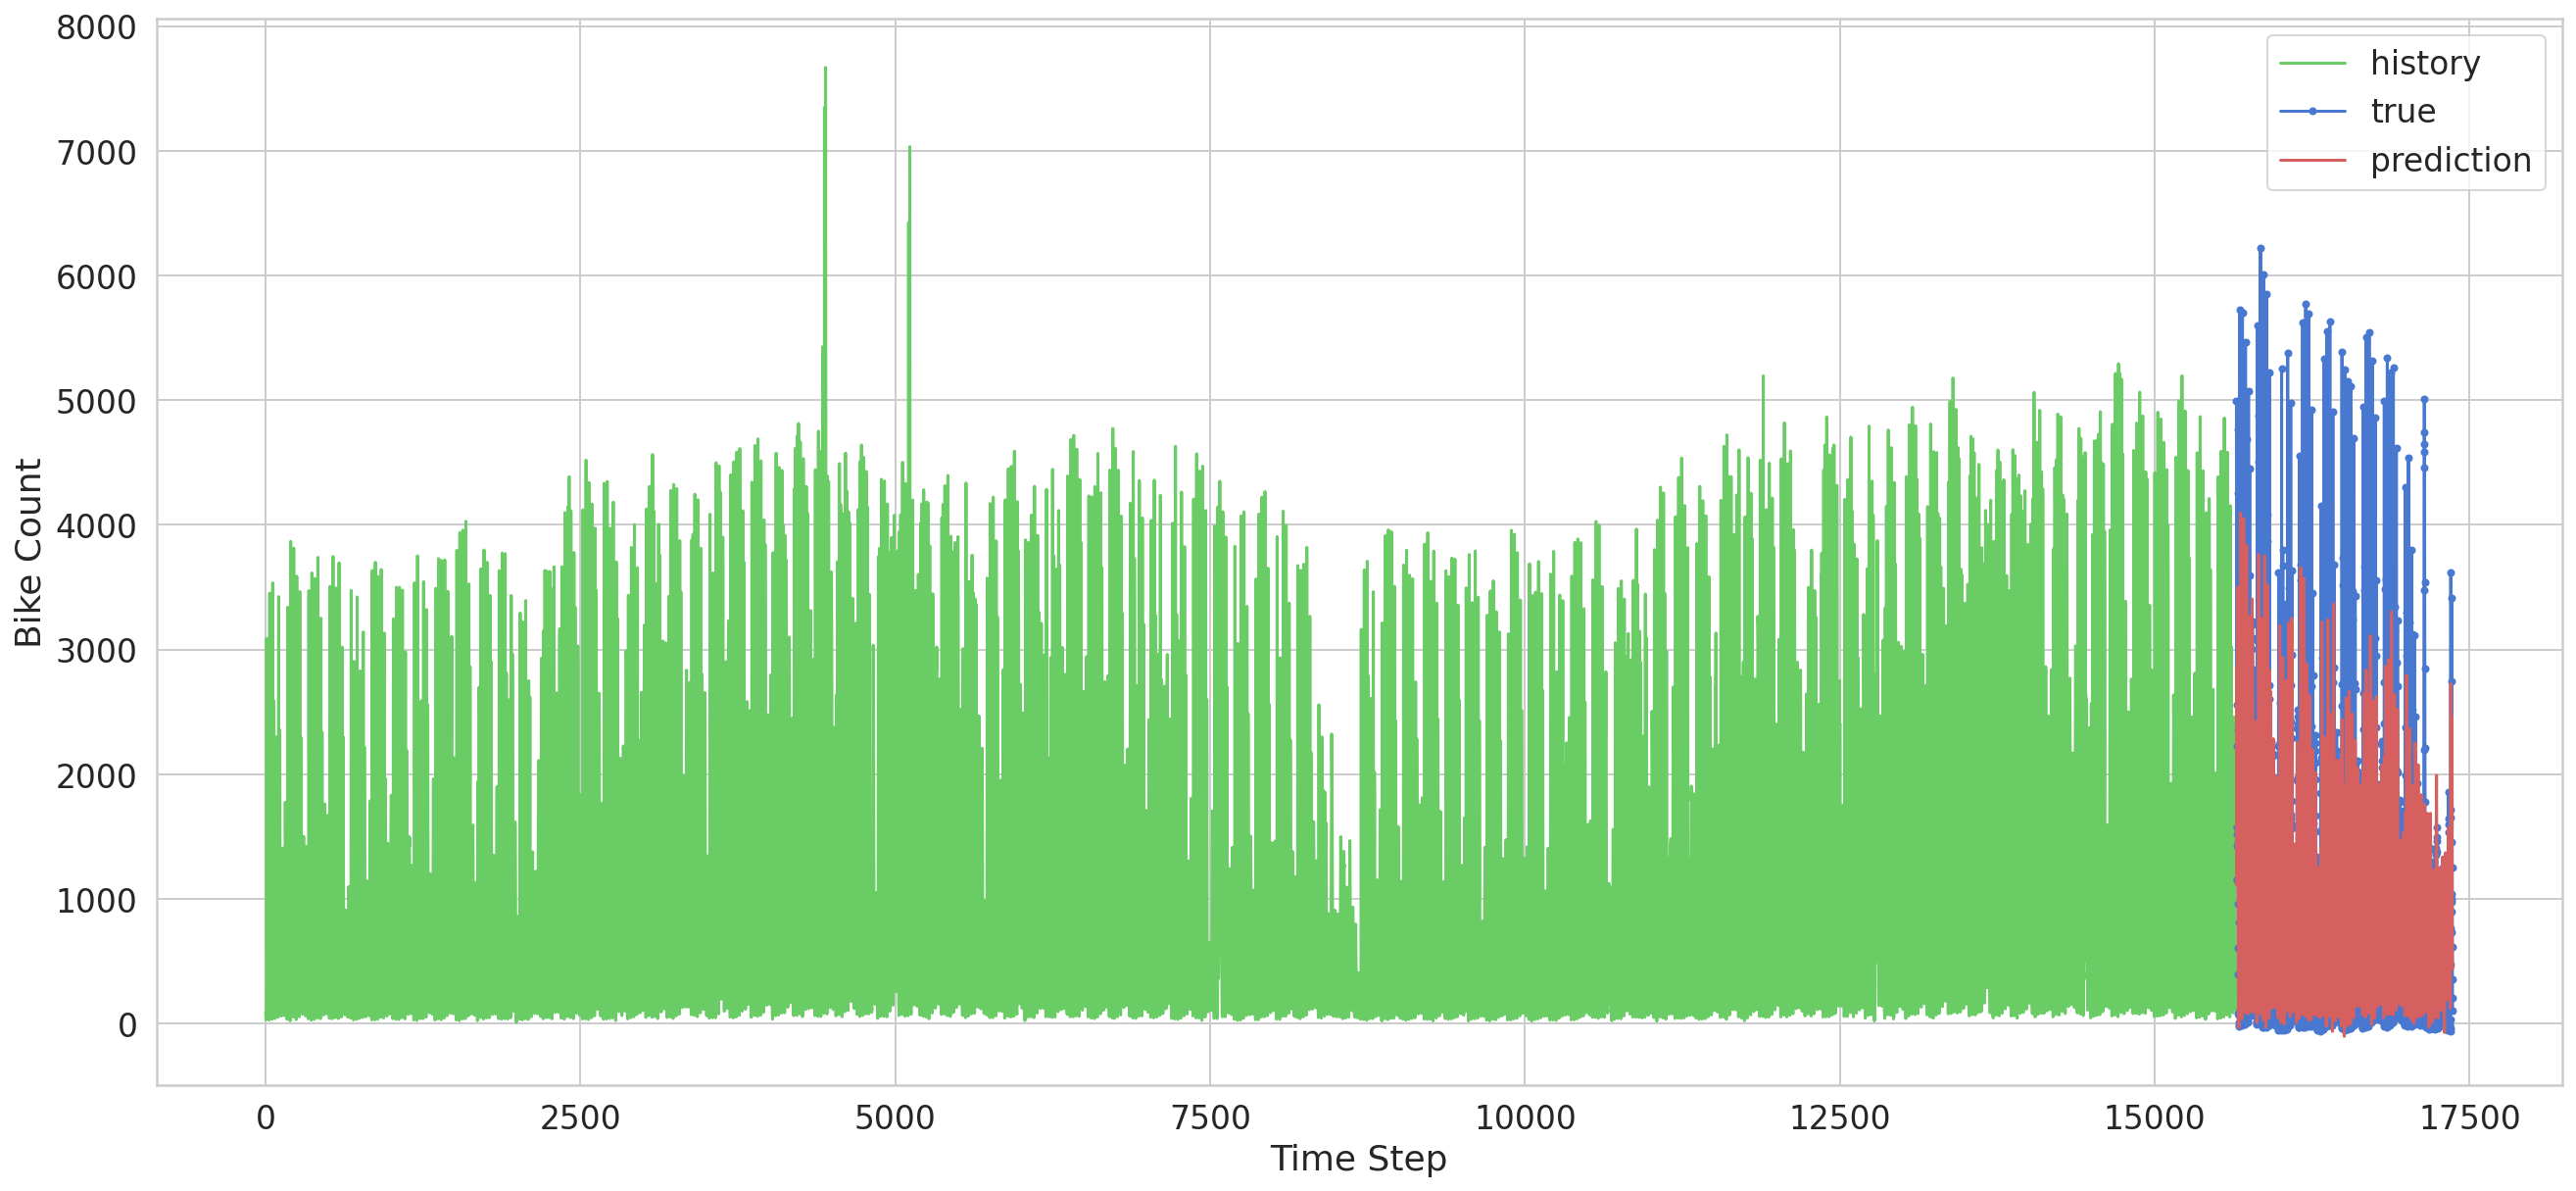

In [36]:

plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

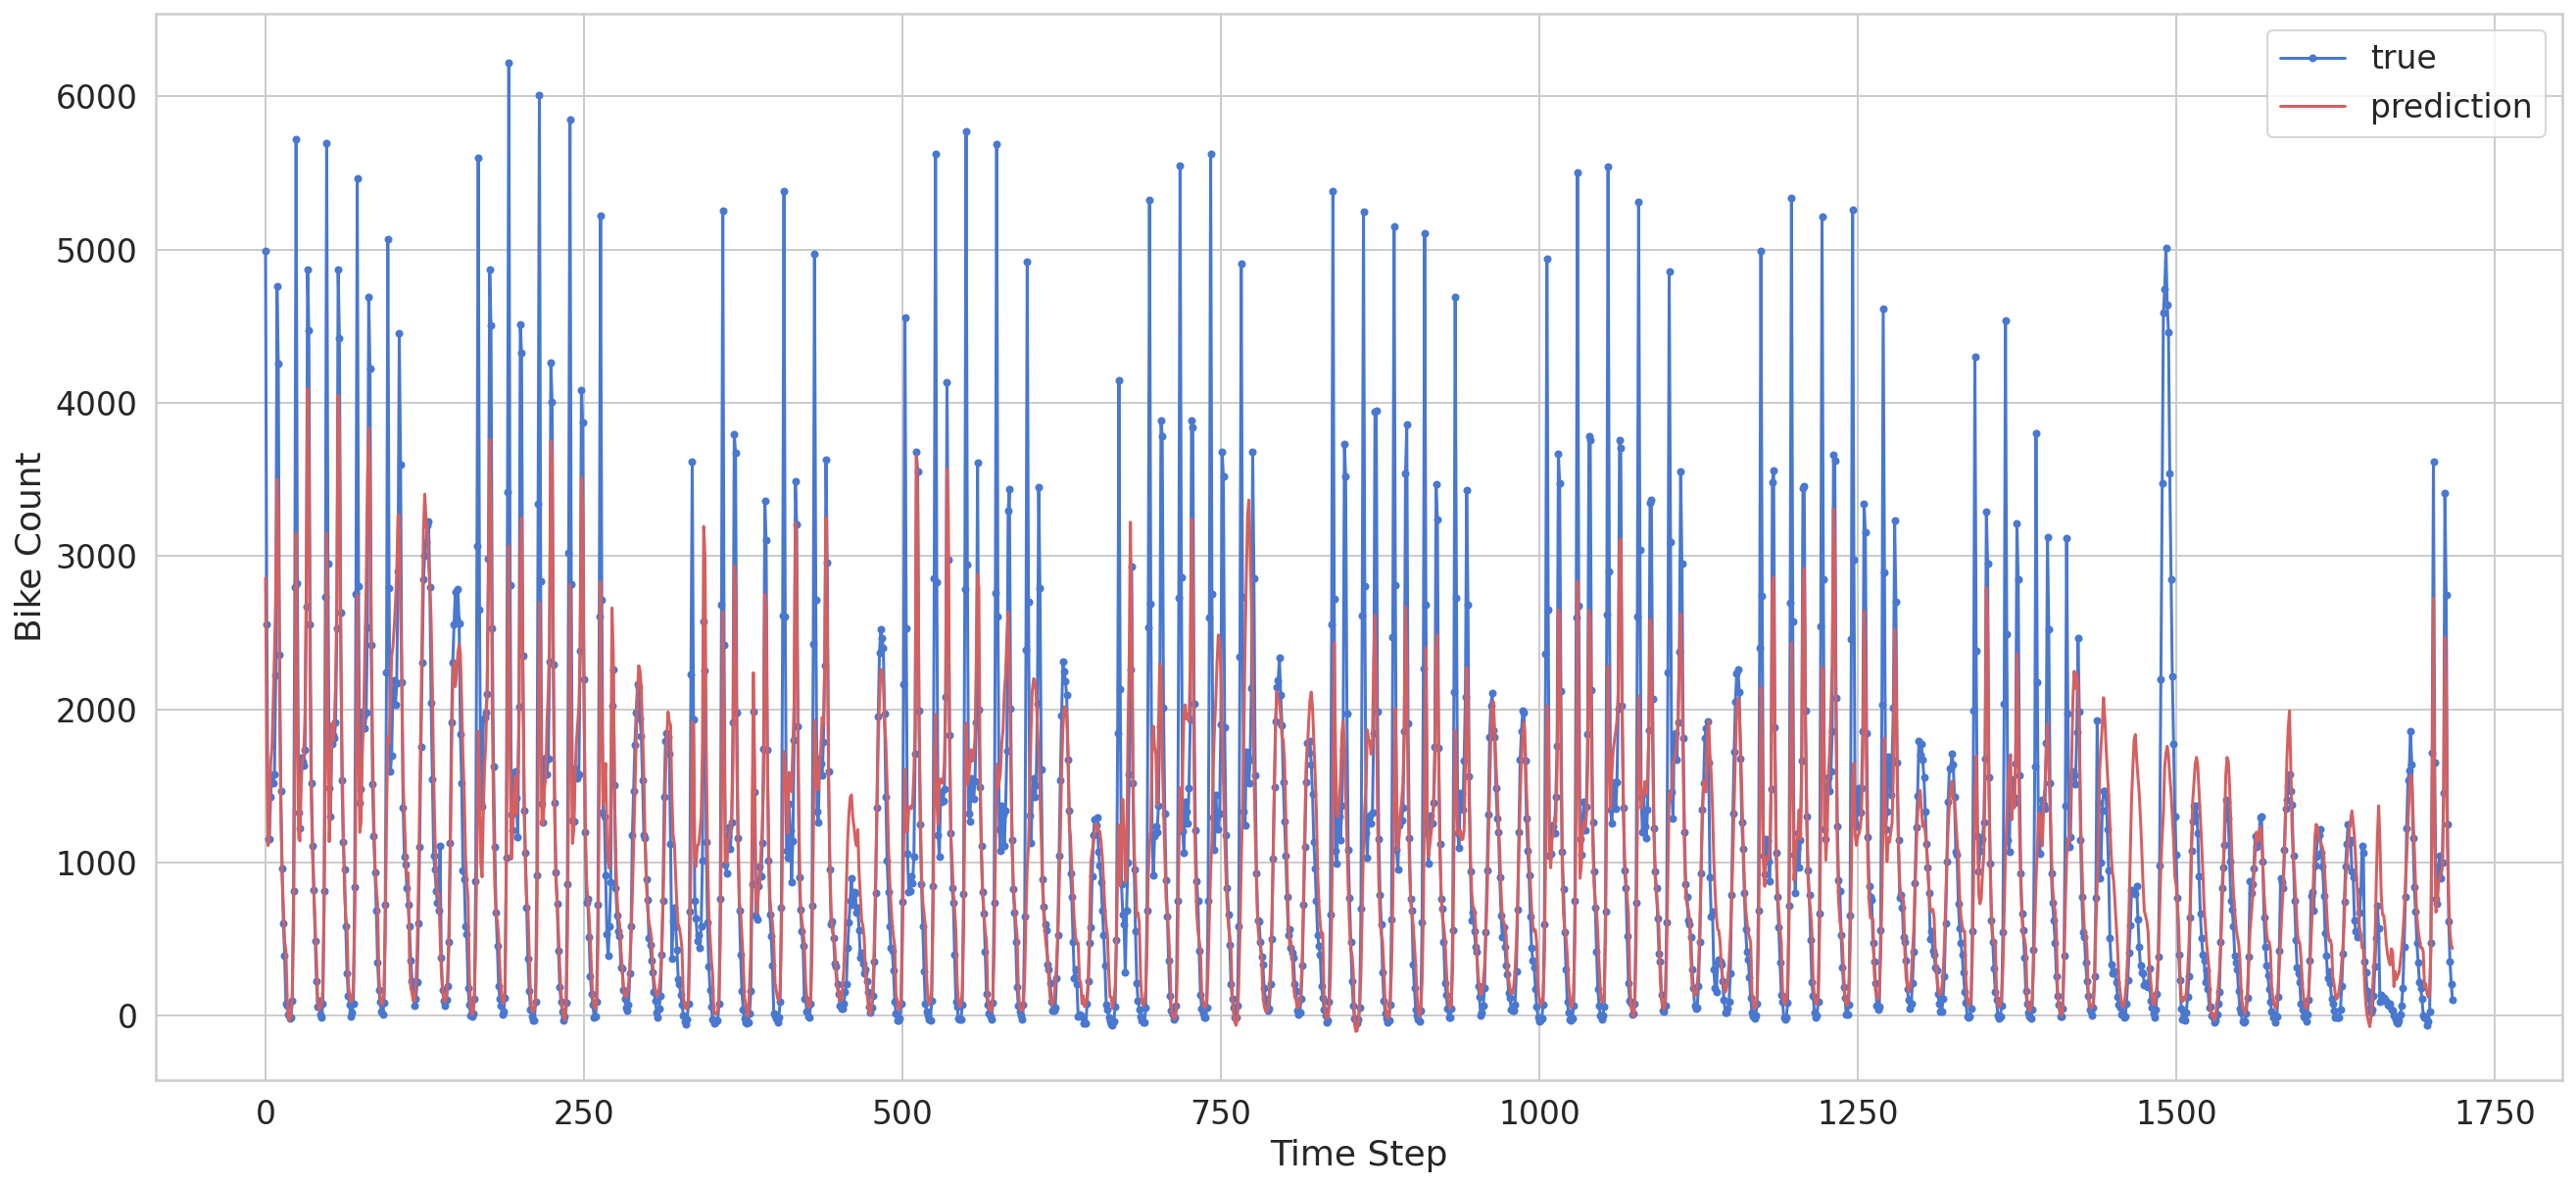

In [37]:
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();